In [1]:
import pyodbc
from azure.identity import ManagedIdentityCredential
from azure.keyvault.secrets import SecretClient
import pandas as pd
 
# get credentials from the Azure ML workspace service principal
credential = ManagedIdentityCredential()
# access the KeyVault in another resource group
KVUri = "https://bdf-dataeng-kv.vault.azure.net"
kVClient = SecretClient(vault_url=KVUri, credential=credential)
 
# create datalake connection
def get_dl_conn():
    con = pyodbc.connect(
        driver="{ODBC Driver 17 for SQL Server}",
        server=kVClient.get_secret("datalake-sqlpool-server-prd").value,
        port=1433,
        database=kVClient.get_secret("datalake-sqlpool-dbname-prd").value,
        uid=kVClient.get_secret("datalake-sqlpool-user-prd").value,
        pwd=kVClient.get_secret("datalake-sqlpool-psw-prd").value,
    )
    print("Connect to Database \U00002705")
    return con



 
class DLorm:
    def __init__(self, connector) -> None:
        self.connector = connector
 
    def get_query(self, query: str, **kwargs) -> pd.DataFrame:
        return pd.read_sql(query, con=self.connector, **kwargs)


In [2]:
con = get_dl_conn()
datalake = DLorm(con)

Connect to Database ✅


In [4]:

query_users= "SELECT top 10 * FROM ds.users"
 
df_query_users = datalake.get_query(query_users)
query_mf = "SELECT top 10 * FROM ds.measures_filtered"
 
df_query_mf = datalake.get_query(query_mf)




/tmp/ipykernel_69782/2746889058.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, con=self.connector, **kwargs)
/tmp/ipykernel_69782/2746889058.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, con=self.connector, **kwargs)


In [5]:
df_query_users.head(5)

,user_id,age,age_group_10y,age_group_5y,birthday,birthday_year,birthday_month,country_name,gender,gender_desc,...,baqi_min,baqi_max,longtimenomeasurement,s4c_volunteer_no,user_type,parent_common_id,elderly_study_user,last_operating_system,last_operating_system_version,last_app_version
0,1677,31,30-39,30-34,1993-01-18,1993,1,Germany,0,female,...,NaN,NaN,0,None,single-user,None,0,None,None,None
1,1697,49,40-49,45-49,1974-07-01,1974,7,Germany,0,female,...,33.0,95.0,0,None,single-user,None,0,iOS,iOS 17.3.1,5.1.12
2,1806,74,60+,60+,1949-07-31,1949,7,Germany,0,female,...,NaN,NaN,0,None,single-user,None,0,None,None,None
3,1950,45,40-49,45-49,1978-09-01,1978,9,Germany,0,female,...,NaN,NaN,0,None,single-user,None,0,Android,Android 11,3.1.8
4,2040,35,30-39,35-39,1988-06-01,1988,6,Germany,0,female,...,30.0,93.0,0,None,1st-user,None,0,iOS,iOS 17.1.2,5.1.6


In [6]:
df_query_mf.head(5)

,user_id,firmware_version,procedure_id,photo_metadata_id,selfie_id,measure_date,measure_hour,procedure_date,create_ts_yearmonth,is_morning,...,datalake_algorithm_name,datalake_algorithm_version,measure_value,device_temperature,device_humidity,device_pressure,is_active_calculation,is_active_aggregation,DS_usage,is_active
0,19681,3.3.0.4,8092785,98258314,None,2023-08-01,5.0,2023-08-01,2023-08,1,...,skintone,3.0,17.038344,25.219999,53.250000,99259.671875,1,0,1,1
1,20641,3.3.0.4,8092829,98258884,None,2023-07-31,12.0,2023-07-31,2023-08,1,...,skintone,3.0,55.445674,34.070000,66.529999,98612.203125,1,0,1,1
2,13663,3.3.0.4,8092853,98259160,None,2023-07-30,17.0,2023-07-30,2023-08,0,...,skintone,3.0,36.873765,22.400000,75.889999,98334.007812,1,0,1,1
3,2304,2.3.0.4,8092889,98259610,None,2023-08-01,5.0,2023-08-01,2023-08,1,...,skintone,3.0,29.839759,25.980000,58.290001,97576.906250,1,0,1,1
4,13212,3.3.0.4,8092973,98260615,None,2023-08-01,5.0,2023-08-01,2023-08,1,...,skintone,3.0,4.929663,27.219999,58.209999,97188.757812,1,0,1,1


In [5]:
# query="SELECT  COUNT(*) AS occurrences FROM ds.users WHERE user_id= 3389"
# df_query=datalake.get_query(query)

# df_query

In [6]:

query_join="SELECT top 20 * FROM ds.measures_filtered WHERE user_id IN ( SELECT user_id FROM ds.users WHERE gender_desc = 'female' AND country_name = 'Thailand')"
df_query_join = datalake.get_query(query_join)
df_query_join

/tmp/ipykernel_69782/2746889058.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, con=self.connector, **kwargs)


,user_id,firmware_version,procedure_id,photo_metadata_id,selfie_id,measure_date,measure_hour,procedure_date,create_ts_yearmonth,is_morning,...,datalake_algorithm_name,datalake_algorithm_version,measure_value,device_temperature,device_humidity,device_pressure,is_active_calculation,is_active_aggregation,DS_usage,is_active
0,4169,2.3.0.4,5301899,63868900,None,2022-01-05,20.0,2022-01-05,2022-01,0,...,ita,1.0,-11.09,29.389999,56.650002,99373.000000,1,1,1,1
1,15775,2.3.0.4,5301931,63869309,None,2021-12-31,20.0,2021-12-31,2022-01,0,...,ita,1.0,39.00,27.670000,63.180000,97273.453125,1,1,1,1
2,16099,2.3.0.4,5302033,63870531,None,2022-01-05,21.0,2022-01-05,2022-01,0,...,ita,1.0,51.48,30.850000,50.950001,97895.007812,1,1,1,1
3,4529,2.3.0.4,5302098,63871336,None,2022-01-04,6.0,2022-01-04,2022-01,1,...,ita,1.0,-7.78,22.969999,65.730003,100170.750000,1,1,1,1
4,18000,2.3.0.4,5302220,63872812,None,2022-01-05,22.0,2022-01-05,2022-01,0,...,ita,1.0,68.58,30.260000,78.800003,101379.828125,1,1,1,1
5,3336,2.3.0.4,5302370,63874616,None,2022-01-05,23.0,2022-01-05,2022-01,0,...,ita,1.0,16.71,26.309999,51.820000,99330.203125,1,1,1,1
6,9443,3.3.0.4,5302704,63878660,None,2022-01-06,1.0,2022-01-05,2022-01,0,...,ita,1.0,6.29,27.820000,59.310001,99175.906250,1,1,1,1
7,11664,2.3.0.4,5304372,63898757,None,2022-01-06,6.0,2022-01-06,2022-01,1,...,ita,1.0,19.94,31.469999,49.680000,101160.468750,1,1,1,1
8,16420,2.3.0.4,5304564,63901065,None,2022-01-06,6.0,2022-01-06,2022-01,1,...,ita,1.0,32.71,33.119999,58.250000,101329.539062,1,1,1,1
9,11646,2.3.0.4,5304632,63901897,None,2022-01-06,7.0,2022-01-06,2022-01,1,...,ita,1.0,-1.47,28.510000,51.110001,101276.679688,1,1,1,1


In [40]:
import pandas as pd
users=pd.DataFrame(df_query_users)
mes_fil=pd.DataFrame(df_query_mf)


In [42]:
import pandas as pd

# assuming your dataframe is called "df"
count_15775 = mes_fil[mes_fil['user_id'] == 15775].shape[0]

print("Count of 15775 in userid column:", count_15775)

Count of 15775 in userid column: 0


In [24]:
joined=pd.DataFrame(df_query_join)
joined.head()

,user_id,firmware_version,procedure_id,photo_metadata_id,selfie_id,measure_date,measure_hour,procedure_date,create_ts_yearmonth,is_morning,...,datalake_algorithm_name,datalake_algorithm_version,measure_value,device_temperature,device_humidity,device_pressure,is_active_calculation,is_active_aggregation,DS_usage,is_active
0,4169,2.3.0.4,5301899,63868900,None,2022-01-05,20.0,2022-01-05,2022-01,0,...,ita,1.0,-11.09,29.389999,56.650002,99373.000000,1,1,1,1
1,15775,2.3.0.4,5301931,63869309,None,2021-12-31,20.0,2021-12-31,2022-01,0,...,ita,1.0,39.00,27.670000,63.180000,97273.453125,1,1,1,1
2,16099,2.3.0.4,5302033,63870531,None,2022-01-05,21.0,2022-01-05,2022-01,0,...,ita,1.0,51.48,30.850000,50.950001,97895.007812,1,1,1,1
3,4529,2.3.0.4,5302098,63871336,None,2022-01-04,6.0,2022-01-04,2022-01,1,...,ita,1.0,-7.78,22.969999,65.730003,100170.750000,1,1,1,1
4,18000,2.3.0.4,5302220,63872812,None,2022-01-05,22.0,2022-01-05,2022-01,0,...,ita,1.0,68.58,30.260000,78.800003,101379.828125,1,1,1,1


In [29]:
# Function to find uninterrupted chunks for a given user ID
def find_chunks(user_id, df):
    # Filter DataFrame for the given user ID
    user_data = df[df['user_id'] == user_id]
    # Sort user data by procedure date
    user_data = user_data.sort_values(by='procedure_date')
    # Initialize variables
    current_chunk_start = None
    current_chunk_end = None
    chunk_counter = 1
    chunks = {}
    # Iterate over procedure dates for the user
    for date in user_data['procedure_date']:
        if current_chunk_start is None:
            current_chunk_start = date
            current_chunk_end = date
        elif date == current_chunk_end + pd.Timedelta(days=1):
            current_chunk_end = date
        else:
            # Add current chunk to dictionary
            chunk_name = f"chunk{chunk_counter}"
            chunk_length = (current_chunk_end - current_chunk_start).days + 1
            chunks[chunk_name] = {'start_date': current_chunk_start, 'end_date': current_chunk_end, 'length': chunk_length}
            # Start a new chunk
            chunk_counter += 1
            current_chunk_start = date
            current_chunk_end = date
    # Add the last chunk to dictionary
    if current_chunk_start is not None:
        chunk_name = f"chunk{chunk_counter}"
        chunk_length = (current_chunk_end - current_chunk_start).days + 1
        chunks[chunk_name] = {'start_date': current_chunk_start, 'end_date': current_chunk_end, 'length': chunk_length}
    return chunks

In [30]:
# Example usage:
# Assuming 'joined' is your DataFrame containing user ID and procedure date columns
user_id = 15775  # Change this to the desired user ID
chunks_dict = find_chunks(user_id, joined)
print(chunks_dict)

{'chunk1': {'start_date': datetime.date(2021, 12, 31), 'end_date': datetime.date(2021, 12, 31), 'length': 1}}


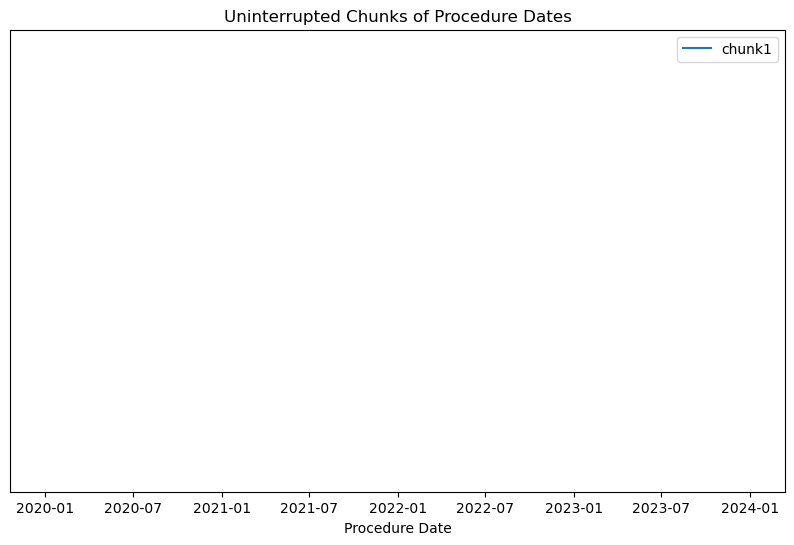

In [31]:
plt.figure(figsize=(10, 6))
for chunk_name, chunk_info in chunks_dict.items():
    plt.plot([chunk_info['start_date'], chunk_info['end_date']], [1, 1], label=chunk_name)
plt.title('Uninterrupted Chunks of Procedure Dates')
plt.xlabel('Procedure Date')
plt.yticks([])  # Hide y-axis
plt.legend()
plt.show()

In [32]:
# Sample DataFrame 'joined' with user ID and procedure date columns
joined2= pd.DataFrame({
    'user_id': [1, 1, 1, 1, 1, 2, 2, 2, 2],
    'procedure_date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-06', '2023-01-07', '2023-01-01', '2023-01-02', '2023-01-04', '2023-01-05'])
})

In [33]:
user_id = 1  # Change this to the desired user ID
chunks_dict = find_chunks(user_id, joined2)
print(chunks_dict)

{'chunk1': {'start_date': Timestamp('2023-01-01 00:00:00'), 'end_date': Timestamp('2023-01-03 00:00:00'), 'length': 3}, 'chunk2': {'start_date': Timestamp('2023-01-06 00:00:00'), 'end_date': Timestamp('2023-01-07 00:00:00'), 'length': 2}}


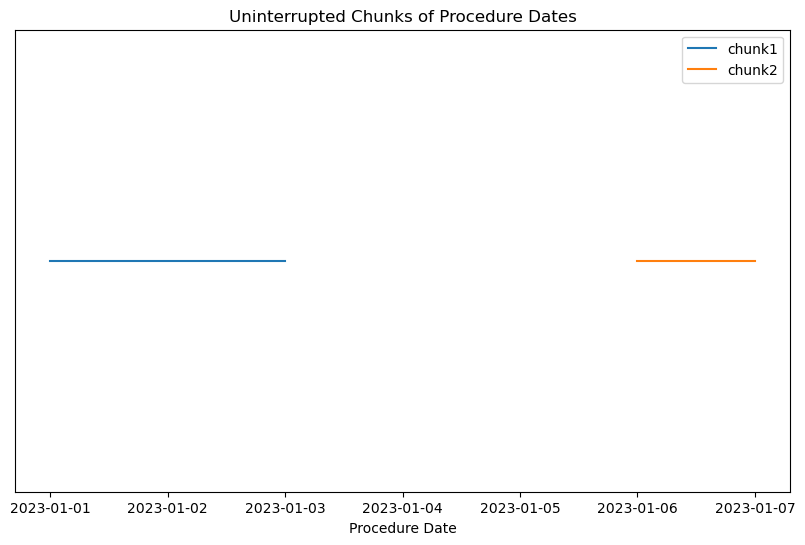

In [37]:
plt.figure(figsize=(10, 6))
for chunk_name, chunk_info in chunks_dict.items():
    plt.plot([chunk_info['start_date'], chunk_info['end_date']], [1, 1], label=chunk_name)
plt.title('Uninterrupted Chunks of Procedure Dates')
plt.xlabel('Procedure Date')
plt.yticks([])  # Hide y-axis
plt.legend()
plt.show()

In [34]:
df=joined

In [39]:
import pandas as pd

# assuming your dataframe is called "df"
count_15775 = df[df['user_id'] == 15775].shape[0]

print("Count of 15775 in userid column:", count_15775)

Count of 15775 in userid column: 1
